| [**Overview**](./00_overview.ipynb) |  **Examples:** |  [Selecting and Indexing Geochem Data](01_indexes_selectors.ipynb) | [Data Munging](02_munging.ipynb) | [Visualisation](03_visualisation.ipynb) |[lambdas](04_lambdas.ipynb) |
|:-----|:-----|:-----|:-----|:-----|:-----|


## Visualisation

`pyrolite` contains an array of visualisation methods, a few of which we'll quickly run through here. For more, check out the [examples gallery](https://pyrolite.readthedocs.io/en/develop/examples/index.html#plotting-examples)!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from util import fetch_GEOROC_csv # this is a funciton we put together in the previous notebook, which arranges a CSV from GEOROC

In [2]:
df = fetch_GEOROC_csv('http://georoc.mpch-mainz.gwdg.de/georoc/Csv_Downloads/Continental_Flood_Basalts_comp/CENTRAL_ATLANTIC_MAGMATIC_PROVINCE_-_CAMP.csv')

In [3]:
df.pyrochem.compositional = df.pyrochem.compositional.replace(0, np.nan)# get rid of some zeroes

### Simple Bivariate Plotting

While there are many ways to get to simple bivariate plots, `pyrolite` provides a few options which can provide a simpler interface and easier access to simple styling configuration.

<AxesSubplot:xlabel='MgO', ylabel='SiO2'>

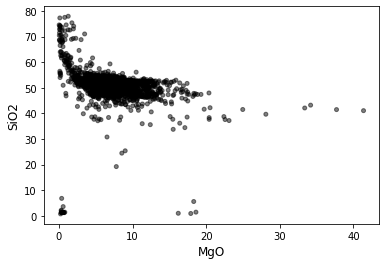

In [4]:
df[['MgO', 'SiO2']].pyroplot.scatter(color='k', marker='o', alpha=0.5)

Where we get to larger datasets, overplotting becomes an issue, and we may want to consider methods for visualising the distribution of data as a whole rather than individual points. `pyrolite` has as few options for this, including 'density' plots and 'heatscatter' plots (based on kernel density estimates).

<AxesSubplot:xlabel='MgO', ylabel='SiO2'>

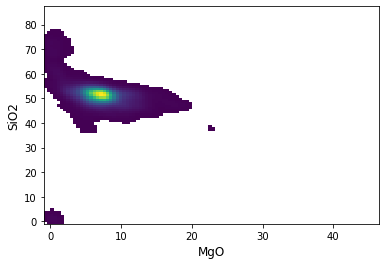

In [5]:
df[['MgO', 'SiO2']].pyroplot.density(bins=100)

<AxesSubplot:xlabel='MgO', ylabel='SiO2'>

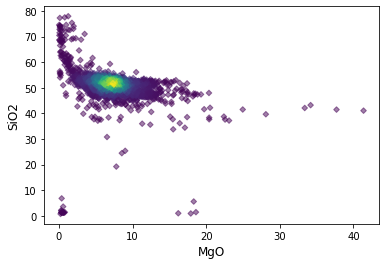

In [6]:
df[['MgO', 'SiO2']].pyroplot.heatscatter(alpha=0.5)

### Ternary Plots

Ternary plots are a common in geochemistry, mineralogy and petrology but dont' necessarily pop up elsewhere. `pyrolite` provides an interface to create ternary plots wherever you pass three columns, making it as simple as creating our bivariate plots above!

<TernaryAxesSubplot:>

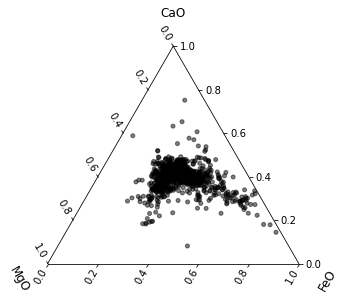

In [7]:
df[['CaO', 'MgO', 'FeO']].pyroplot.scatter(color='k', marker='o', alpha=0.5)

In contrast to most ternary plots, however, we can also create data density visualisations (based on distributions in logratio space):

<TernaryAxesSubplot:>

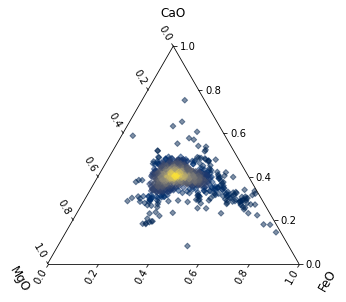

In [8]:
df[['CaO', 'MgO', 'FeO']].pyroplot.heatscatter(alpha=0.5, cmap='cividis')

### Spider Plots

Visualisation of multivariate patterns in geochemical data can be a challenge, but one tool well adpated to is the 'spiderplot'. In most cases, you'll want to visualise normalised data (e.g. to Chondrite or Primitive Mantle) such that the effects of nuceleosynthesis and planetary formation are removed and you can instead dig deeper into processes which have happend since. The `pyrolite.pyrochem` API can be chained together with the `pyolite.pyroplot` API to do this in one line - here we'll pull up some REE data (note that some of it looks like it could be pre-normalised!).

<AxesSubplot:>

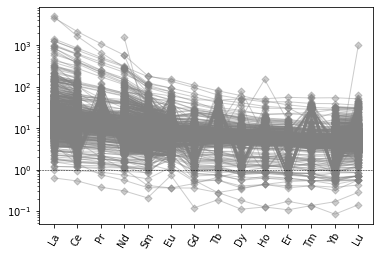

In [9]:
df.pyrochem.REE.pyrochem.normalize_to('PM_PON').pyroplot.spider(unity_line=True, color='0.5', alpha=0.4)

For the REE data specifically, there's also a method which will scale axes to ionic radii:

<AxesSubplot:xlabel='Element', ylabel=' $\\mathrm{X / X_{Reference}}$'>

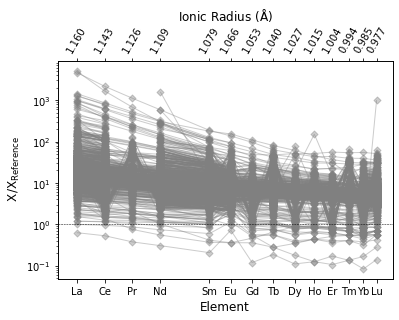

In [10]:
df.pyrochem.REE.pyrochem.normalize_to('PM_PON').pyroplot.REE(unity_line=True, color='0.5', alpha=0.4)

We can also style this as above, including by colormapping a particular variable:

<AxesSubplot:xlabel='Element', ylabel=' $\\mathrm{X / X_{Reference}}$'>

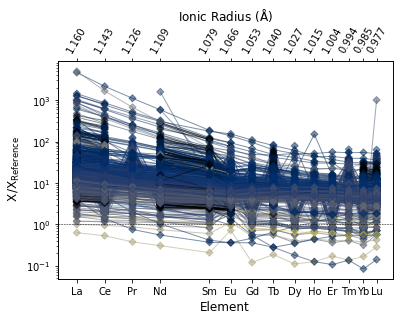

In [11]:
df.pyrochem.REE.pyrochem.normalize_to('PM_PON').pyroplot.REE(unity_line=True, c=df['MgO'], cmap='cividis', alpha=0.5)

We can also make conditional density spider plots - here it highlights the few samples with REE data errors!

<AxesSubplot:xlabel='Element', ylabel=' $\\mathrm{X / X_{Reference}}$'>

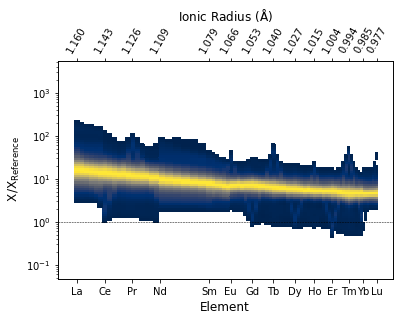

In [12]:
df.pyrochem.REE.pyrochem.normalize_to('PM_PON').pyroplot.REE(unity_line=True, mode='binkde', bins=100, yextent=(0.5, 500), vmin=0.03, cmap='cividis')